# Fashion-MNIST-Functional-SGD
In this case a NN is built using pytorch defining a class for the architecture and then the functional module is used. It is the most common and concise way to build a NN but it is a bit harder to grasp and manipulate than the use of a class without the module.

Dropout is also used to improve test results.

As optimizer is used the stochastic gradient descent (SGD).

### Importing the libraries and loading the data

In [0]:
# Importing libraries
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import helper
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

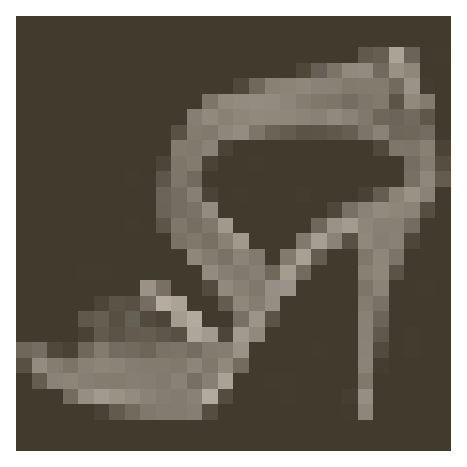

In [0]:
#Viewing the images
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

### Defining the architecture of the network 

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        # Output so no dropout
        x = F.log_softmax(self.fc4(x), dim=1)        
        return x
# Define the loss and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

### Train the network

In [0]:
# Preparing images and labels as iterations of the batch
images, labels = next(iter(trainloader))
# Flatten MNIST images into a 784 long vector
images = images.view(image.shape[0], -1)
images.resize_(64, 784)
epochs = 15
steps = 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()        
        # Take an update step and few the new weights
        optimizer.step()        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)                
                ps = torch.exp(log_ps)
                #To obtain the class with the highest probability using method ps.topk
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/15..  Training Loss: 2.124..  Test Loss: 1.754..  Test Accuracy: 0.376
Epoch: 2/15..  Training Loss: 1.377..  Test Loss: 1.118..  Test Accuracy: 0.572
Epoch: 3/15..  Training Loss: 0.980..  Test Loss: 0.899..  Test Accuracy: 0.662
Epoch: 4/15..  Training Loss: 0.828..  Test Loss: 0.795..  Test Accuracy: 0.701
Epoch: 5/15..  Training Loss: 0.750..  Test Loss: 0.754..  Test Accuracy: 0.708
Epoch: 6/15..  Training Loss: 0.711..  Test Loss: 0.706..  Test Accuracy: 0.736
Epoch: 7/15..  Training Loss: 0.679..  Test Loss: 0.681..  Test Accuracy: 0.748
Epoch: 8/15..  Training Loss: 0.647..  Test Loss: 0.651..  Test Accuracy: 0.763
Epoch: 9/15..  Training Loss: 0.622..  Test Loss: 0.633..  Test Accuracy: 0.768
Epoch: 10/15..  Training Loss: 0.602..  Test Loss: 0.606..  Test Accuracy: 0.783
Epoch: 11/15..  Training Loss: 0.584..  Test Loss: 0.596..  Test Accuracy: 0.786
Epoch: 12/15..  Training Loss: 0.567..  Test Loss: 0.586..  Test Accuracy: 0.792
Epoch: 13/15..  Training Loss: 0.553.

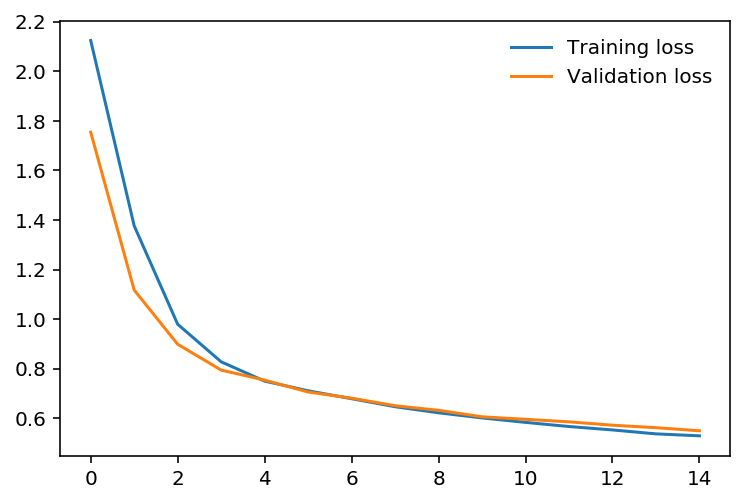

In [0]:
# To graph the losses
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

### Accuracy

In [0]:
#To get the accuracy of a batch
images, labels = next(iter(testloader))
images.resize_(64, 784)
with torch.no_grad():
    ps = torch.exp(model(images))
    top_p, top_class = ps.topk(1, dim=1)
    equals = top_class == labels.view(*top_class.shape)
#Equals is in the form of 0s and 1s, so the total sum divided by the total size of items gives the accuracy.
#Accuracy is a mean of how much the model got right
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 84.375%


### To print the results

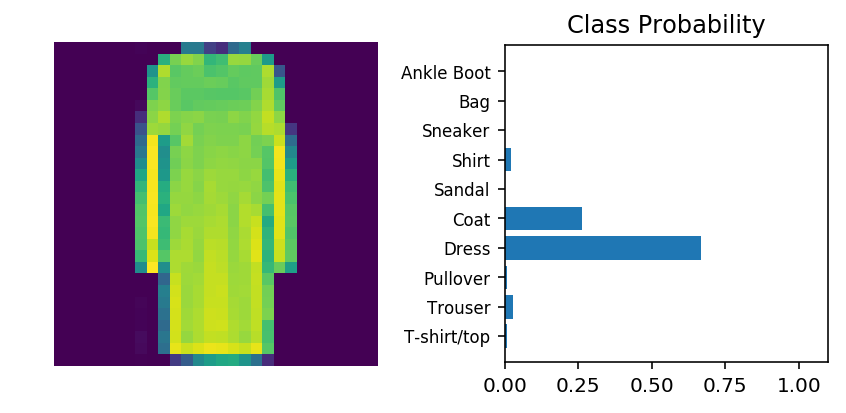

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
images, labels = next(iter(testloader))
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)
# Calculate the class probabilities (softmax) for img    
ps = F.softmax(logits, dim=1)
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')